In [105]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [106]:
df = pd.read_csv('../data/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

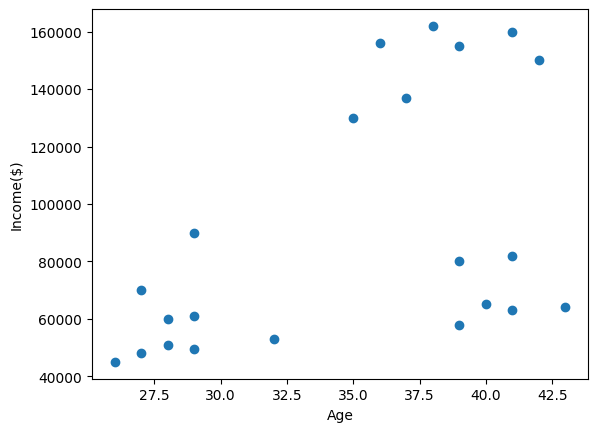

In [107]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [108]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [109]:
kmc = KMeans(n_clusters=3)
y_pred = kmc.fit_predict(df[['Age','Income($)']])
y_pred

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [110]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


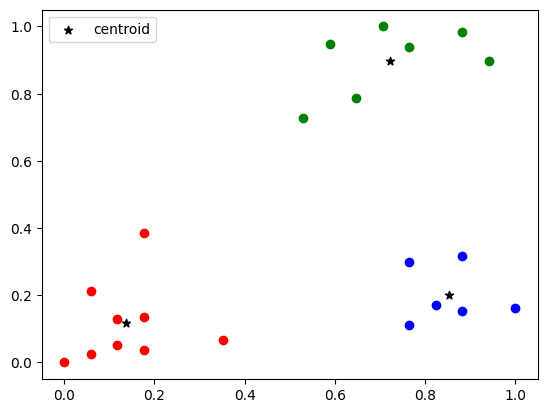

In [112]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.scatter(df1['Age'],df1['Income($)'] , color='red')
plt.scatter(df2['Age'],df2['Income($)'] ,  color='green')
plt.scatter(df3['Age'],df3['Income($)'] , color='blue')
plt.scatter(kmc.cluster_centers_[:,0],kmc.cluster_centers_[:,1], marker='*', color="black",label='centroid')
plt.legend()